### 1. Reading the data and Converting to required Format

In [1]:
#importing the required packages
import pandas as pd
import numpy as np 
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Reading in the data 
df=pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
df.columns=['Spam/Ham','EmailContent']

In [3]:
df.head(5)

,Spam/Ham,EmailContent
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [4]:
df.shape

(5568, 2)

In [5]:
#Checking for number of spams
groupedf=df.groupby('Spam/Ham').count()
groupedf.head(15)

,EmailContent
Spam/Ham,
ham,4822
spam,746


### 2.Preprocessing the Data

In [6]:
#Preprocessing by removing null values if present
df.isnull().sum()

Spam/Ham        0
EmailContent    0
dtype: int64

In [7]:
#Precprocessing by removing  duplicates
cleaned_df=df.drop_duplicates(subset=['EmailContent'])

In [8]:
print(len(cleaned_df))
print(cleaned_df.shape)

5165
(5165, 2)


Since dates are not mentioned,we cannot conclude whether its a duplicate entry.Spams generally have the same content but sent every day.
Im not removing duplicates as of now but you can(its a personal choice).

In [9]:
cleaned_df.head(4)

,Spam/Ham,EmailContent
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...


### 3.Tokenisation and Cleaning

In [10]:
#importing the required packages
import string
import re
import nltk
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [11]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\b16z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\b16z\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
stopwords=nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()#Initialising Stemming
wn = nltk.WordNetLemmatizer()#Initialising Lemmatisation

In [13]:
def clean_text_trial(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#Removing punctuation
    tokens = re.split('\W+', text)#Using regex for tokenising-splitting by non word
    text = [word for word in tokens if word not in stopwords]#Stemming and removing stopwords
    return text

df['body_text_filtered'] = df['EmailContent'].apply(lambda x: clean_text_trial(x.lower()))

df.head()

,Spam/Ham,EmailContent,body_text_filtered
0,ham,I've been searching for the right words to tha...,"[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"


In [14]:
#Comparison between stemming and lemmatising
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text


def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['body_text_lemmatized'] = df['body_text_filtered'].apply(lambda x: lemmatizing(x))

df['body_text_stemmed'] = df['body_text_filtered'].apply(lambda x: stemming(x))

df.head(10)

,Spam/Ham,EmailContent,body_text_filtered,body_text_lemmatized,body_text_stemmed
0,ham,I've been searching for the right words to tha...,"[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]","[date, sunday]"
5,ham,As per your request 'Melle Melle (Oru Minnamin...,"[per, request, melle, melle, oru, minnaminungi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint..."
6,spam,WINNER!! As a valued network customer you have...,"[winner, valued, network, customer, selected, ...","[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv..."
7,spam,Had your mobile 11 months or more? U R entitle...,"[mobile, 11, months, u, r, entitled, update, l...","[mobile, 11, month, u, r, entitled, update, la...","[mobil, 11, month, u, r, entitl, updat, latest..."
8,ham,I'm gonna be home soon and i don't want to tal...,"[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...","[six, chances, win, cash, 100, 20000, pounds, ...","[six, chance, win, cash, 100, 20000, pound, tx...","[six, chanc, win, cash, 100, 20000, pound, txt..."


Generally stemming outperforms lemmatisation while lemmatisation becomes very effective in certain cases.In our scenario,stemming seems to give better results.If you observe 2nd row and 8th row ,the word entry,entitled,update is lemmatised as entri,entitl and updat.Stemming more or less better understanding our text.

In [15]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])#Removing punctuation
    tokens = re.split('\W+', text)#Using regex for tokenising-splitting by non word
    text = [ps.stem(word) for word in tokens if word not in stopwords]#Stemming and removing stopwords
    return text

### 4.Feature Addition

In [16]:
#Adding in more features -actual content length removing white spaces and percent of punctuation in spam
#This is based on the assumption that spams have higher body length and more number of punctuations
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['body_len'] = df['EmailContent'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['EmailContent'].apply(lambda x: count_punct(x))

In [17]:
df.head(3)

,Spam/Ham,EmailContent,body_text_filtered,body_text_lemmatized,body_text_stemmed,body_len,punct%
0,ham,I've been searching for the right words to tha...,"[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,...","[ive, search, right, word, thank, breather, pr...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]","[nah, dont, think, goe, usf, live, around, tho...",49,4.1


Lets evaluate if these features actually add some value to the model?

C:\Users\b16z\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\b16z\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


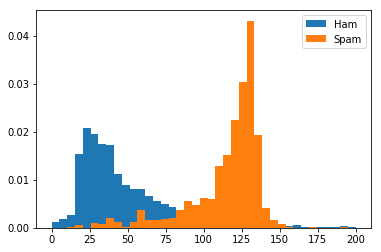

In [18]:
import matplotlib.pyplot as plt
bins=np.linspace(0,200,40)
plt.figure()
plt.hist(df[df['Spam/Ham']=='ham']['body_len'],bins,label='Ham',normed=True)
plt.hist(df[df['Spam/Ham']=='spam']['body_len'],bins,label='Spam',normed=True)
plt.legend(loc='best')
plt.show();

From the histogram its pretty evident that Spam messages have higher length of text messages .And this feature has higher chances of improving our  models predictions

C:\Users\b16z\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\b16z\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


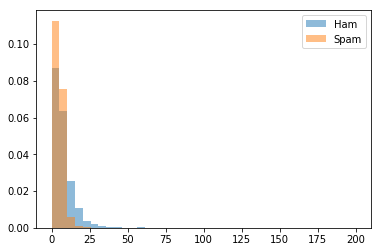

In [19]:
bins=np.linspace(0,200,40)
plt.figure()
plt.hist(df[df['Spam/Ham']=='ham']['punct%'],bins,alpha=.5,label='Ham',normed=True)
plt.hist(df[df['Spam/Ham']=='spam']['punct%'],bins,alpha=.5,label='Spam',normed=True)
plt.legend(loc='best')
plt.show();

From the histogram its observed that though there is slight difference between punctuation usage in ham and spam ,its not very distinct.Lets include the feature as of now because the number of features are not very high in this specific dataset. 

In [20]:
df.head()

,Spam/Ham,EmailContent,body_text_filtered,body_text_lemmatized,body_text_stemmed,body_len,punct%
0,ham,I've been searching for the right words to tha...,"[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,...","[ive, search, right, word, thank, breather, pr...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]","[nah, dont, think, goe, usf, live, around, tho...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,"[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,...",62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]","[date, sunday]",28,7.1


In [21]:
spam_words = df[df['Spam/Ham'] == 'spam']['body_text_stemmed']
ham_words = df[df['Spam/Ham'] == 'ham']['body_text_stemmed']

In [22]:
comment_words = ' '
for val in spam_words: 
    for words in val: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

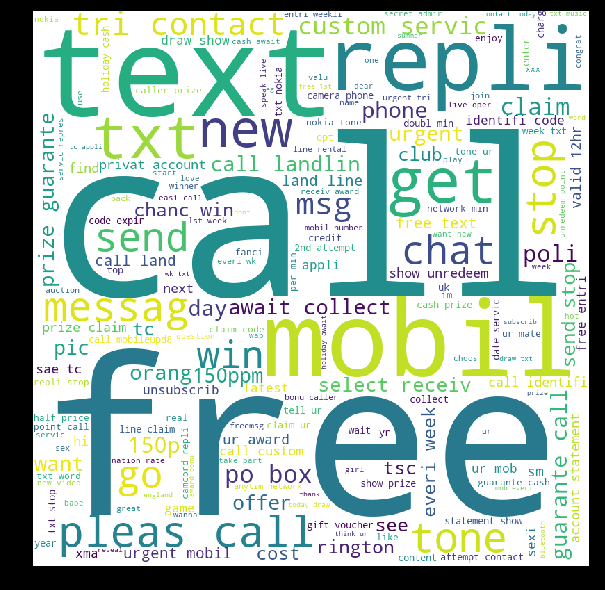

In [23]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [24]:
comment_words = ' '
for val in ham_words: 
    for words in val: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

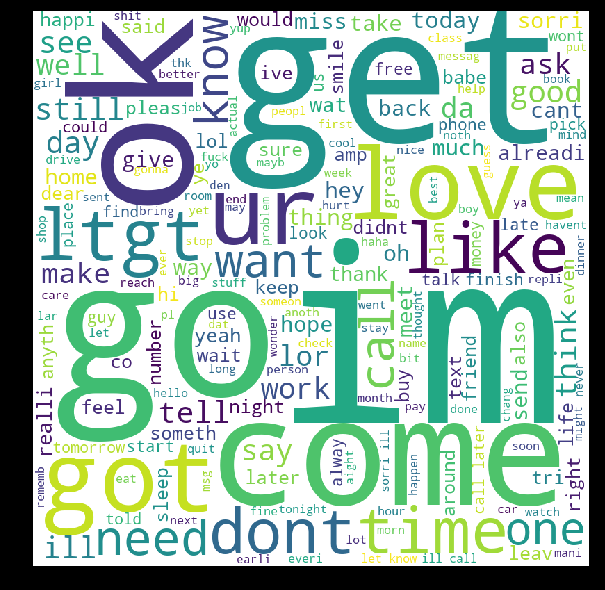

In [25]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

From the pictorial representation,its pretty clear that there is clear distinction between words in a spam mail which makes our task easier.

### 5.Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['EmailContent','body_len','punct%']], df['Spam/Ham'], test_size=0.3)

### 6.Vectorisation

TfidfVectoriser is a modification of Count Vectoriser where it considers length of document(in our case text message) and occurence of words.N-grams are generally for obtaining group of words applied within these two vectorisation methods as an additional criteria.Here I am considering tfidf vectorisation technique because I have also added an additional feature body_len based on the hypothesis that spam messages have more text content,so length of document is important feature and taken into consideration while vectorising by tfidf method.

From model accuracy perspective,tfidf and count vectoriser techniques didnt not much have impact because we have already added body_len as an additional feature while modelling. 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)#Initialising the model
tfidf_vect_fit = tfidf_vect.fit(X_train['EmailContent'])#Fitting the train set to model

tfidf_train = tfidf_vect_fit.transform(X_train['EmailContent'])#Transforming the train set
tfidf_test = tfidf_vect_fit.transform(X_test['EmailContent'])#Transforming the test set


#Concatenating the transformed test and train sets with additional features constructed earlier
X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)



In [28]:
X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,6674,6675,6676,6677,6678,6679,6680,6681,6682,6683
0,190,8.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,59,1.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,79,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,39,20.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X_test_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,6674,6675,6676,6677,6678,6679,6680,6681,6682,6683
0,119,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.252762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,130,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,74,5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 7.Training Different models and Evaluation of Model

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

#### 7.1 KNN Classifier

In [31]:
i=np.arange(1,20)
accuracy_test=[]
accuracy_train=[]
for x in i:
    KNN_model = KNeighborsClassifier(n_neighbors=x,n_jobs=-1)#Instantiate
    KNN_model.fit(X_train_vect, y_train)#Fit
    prediction1 = KNN_model.predict(X_test_vect)#Predict on test set
    acc_test = accuracy_score(y_test, prediction1)
    accuracy_test.append(acc_test)
    prediction2 = KNN_model.predict(X_train_vect)#Predict on train set
    acc_train = accuracy_score(y_train,prediction2)
    accuracy_train.append(acc_train)


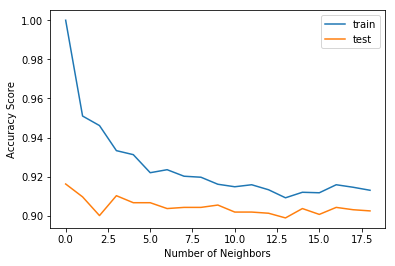

In [32]:
#Plotting the accuracy versus number of neighbors value to find best value of n_neighbors
plt.figure()
plt.plot(accuracy_train,label='train')
plt.plot(accuracy_test,label='test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [33]:
#After finding ideal N-neighbors,lets evaluate the model.

KNN_model = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
KNN_model.fit(X_train_vect, y_train)
y_pred=KNN_model.predict(X_train_vect)
print(f"Train:{accuracy_score(y_train, y_pred)}")
y_pred=KNN_model.predict(X_test_vect)
print(f"Test:{accuracy_score(y_test, y_pred)}")

Train:0.9160892994611239
Test:0.9054458408138839


#### 7.2 Decision Tree Classifier

In [34]:
#i is the array storing maximum depth values
i=range(25,45)
accuracy_test=[]
accuracy_train=[]
for x in i:
    #Instantiate the model
    DT_model = DecisionTreeClassifier(max_depth=x)
    #Fit the model 
    DT_model.fit(X_train_vect, y_train)
    #Evaluate the model on test dataset
    acc_test=DT_model.score(X_test_vect,y_test)
    accuracy_test.append(acc_test)
    #Evaluate the model on train dataset
    acc_train=DT_model.score(X_train_vect, y_train)
    accuracy_train.append(acc_train)
    

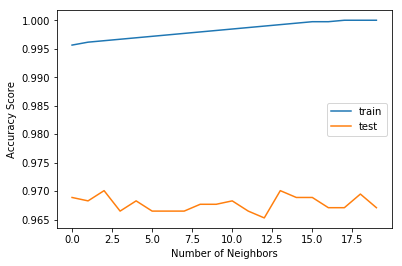

In [35]:
#Lets visualise the accuarcy versus depth of DT tree to estimate ideal value
plt.figure()
plt.plot(accuracy_train,label='train')
plt.plot(accuracy_test,label='test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [31]:
#Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=10)
#Fit the model
DT_model.fit(X_train_vect, y_train)
#Predict on train and test set
y_pred_DT_train=DT_model.predict(X_train_vect)
y_pred_DT_test=DT_model.predict(X_test_vect)
#Evaluate the model
print(f"Train:{accuracy_score(y_train, y_pred_DT_train)}")
print(f"Test:{accuracy_score(y_test, y_pred_DT_test)}")

Train:0.9774185270721067
Test:0.9533213644524237


#### 7.3 SVM-Linear and RBF Kernel

In [32]:
from sklearn.svm import SVC

#Instantiate the models
my_kernel_SVM = SVC()
my_linear_kernel_SVM = SVC(kernel='linear')


#Fit the data
my_linear_kernel_SVM.fit(X_train_vect,y_train)
my_kernel_SVM.fit(X_train_vect,y_train)

#Evaluate/Score
print('SVM-Rbf')
print(f"Train:{my_kernel_SVM.score(X_train_vect,y_train)}")
print(f"Test:{my_kernel_SVM.score(X_test_vect,y_test)}")
print('\nSVM-Linear')
print(f"Train:{my_linear_kernel_SVM.score(X_train_vect,y_train)}")
print(f"Test:{my_linear_kernel_SVM.score(X_test_vect,y_test)}")

C:\Users\b16z\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM-Rbf
Train:0.8917115730048756
Test:0.895870736086176

SVM-Linear
Train:0.9961508852963818
Test:0.9814482345900658


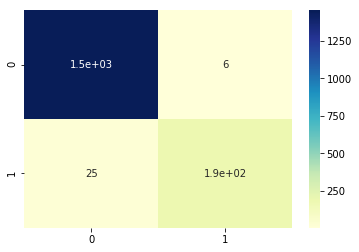

In [33]:
from sklearn.metrics import confusion_matrix

y_pred=my_linear_kernel_SVM.predict(X_test_vect)
CT_SVM=confusion_matrix(y_test,y_pred)
sns.heatmap(CT_SVM,annot=True,cmap='YlGnBu')

Since here more than accuracy,precison is what matters(we do not want actual emails to fall in spam category),we evaluate models with decent accuracy based on precision further.

In [34]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,pos_label='spam')

0.9692307692307692

#### 7.4 Random Forest

In [39]:
i=range(100,200)
accuracy_test=[]
accuracy_train=[]
for x in i:
    #Instantiate the model
    RF_model = RandomForestClassifier(n_estimators=x)
    #Fit the model 
    RF_model.fit(X_train_vect, y_train)
    #Evaluate the model on test dataset
    acc_test=RF_model.score(X_test_vect,y_test)
    accuracy_test.append(acc_test)
    #Evaluate the model on train dataset
    acc_train=RF_model.score(X_train_vect, y_train)
    accuracy_train.append(acc_train)

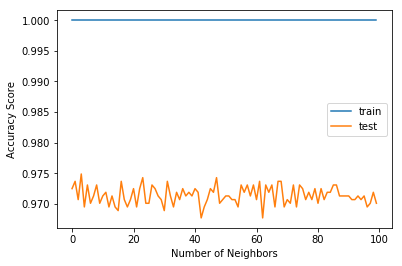

In [40]:
#Lets visualise the accuarcy versus depth of DT tree to estimate ideal value
plt.figure()
plt.plot(accuracy_train,label='train')
plt.plot(accuracy_test,label='test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [35]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)


print(f"Train:{rf_model.score(X_train_vect,y_train)}")
print(f"Test:{rf_model.score(X_test_vect,y_test)}")


Train:1.0
Test:0.9796529024536206


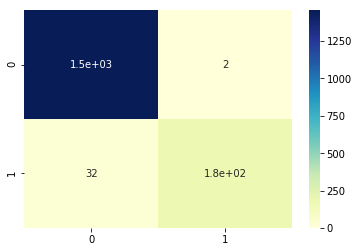

In [36]:
from sklearn.metrics import confusion_matrix

y_pred=rf_model.predict(X_test_vect)
CT_RF=confusion_matrix(y_test,y_pred)
sns.heatmap(CT_RF,annot=True,cmap='YlGnBu')

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,pos_label='spam')

0.9891304347826086

#### 7.5 Gradient Boosting 

In [42]:
i=range(100,200)
accuracy_test=[]
accuracy_train=[]
for x in i:
    #Instantiate the model
    GB_model = GradientBoostingClassifier(n_estimators=x)
    #Fit the model 
    GB_model.fit(X_train_vect, y_train)
    #Evaluate the model on test dataset
    acc_test=GB_model.score(X_test_vect,y_test)
    accuracy_test.append(acc_test)
    #Evaluate the model on train dataset
    acc_train=GB_model.score(X_train_vect, y_train)
    accuracy_train.append(acc_train)

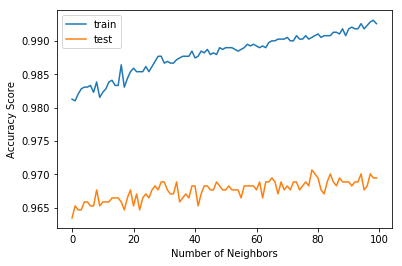

In [43]:
#Lets visualise the accuarcy versus depth of DT tree to estimate ideal value
plt.figure()
plt.plot(accuracy_train,label='train')
plt.plot(accuracy_test,label='test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [38]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth=11)
gb_model = gb.fit(X_train_vect, y_train)
y_pred = gb_model.predict(X_test_vect)


print(f"Train:{gb_model.score(X_train_vect,y_train)}")
print(f"Test:{gb_model.score(X_test_vect,y_test)}")


Train:1.0
Test:0.9706762417713943


In [39]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,pos_label='spam')

0.914572864321608

#### 7.6 AdaBoost

In [45]:
train_scores = []
test_scores = []
for i in np.arange(1,100):
    my_adaboost = AdaBoostClassifier(n_estimators=i)
    my_adaboost.fit(X_train_vect,y_train)
    train_scores.append(my_adaboost.score(X_train_vect,y_train))
    test_scores.append(my_adaboost.score(X_test_vect,y_test))

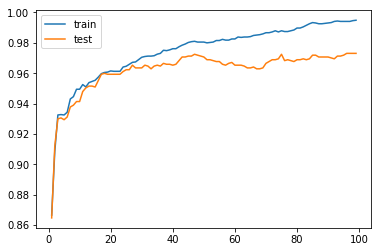

In [46]:
plt.figure()
plt.plot(np.arange(1,100),train_scores,label = 'train')
plt.plot(np.arange(1,100),test_scores,label = 'test')
plt.legend()
plt.show()

In [40]:
my_adaboost = AdaBoostClassifier(n_estimators=150)
my_adaboost.fit(X_train_vect,y_train)

print(f"Train:{my_adaboost.score(X_train_vect,y_train)}")
print(f"Test:{my_adaboost.score(X_test_vect,y_test)}")

Train:0.9989735694123685
Test:0.9796529024536206


In [41]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,pos_label='spam')

0.914572864321608

#### 7.7 XGBoost 

In [43]:
from xgboost import XGBClassifier

In [48]:
train_scores = []
test_scores = []
for i in np.arange(1,100,4):
    XGB_model = XGBClassifier(n_estimators=i)
    XGB_model.fit(X_train_vect,y_train)
    train_scores.append(XGB_model.score(X_train_vect,y_train))
    test_scores.append(XGB_model.score(X_test_vect,y_test))

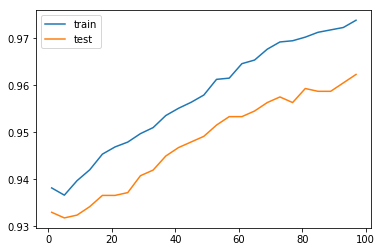

In [49]:
plt.figure()
plt.plot(np.arange(1,100,4),train_scores,label = 'train')
plt.plot(np.arange(1,100,4),test_scores,label = 'test')
plt.legend()
plt.show()

In [44]:
XGB_model = XGBClassifier(n_estimators=100)
XGB_model.fit(X_train_vect,y_train)

print(f"Train:{XGB_model.score(X_train_vect,y_train)}")
print(f"Test:{XGB_model.score(X_test_vect,y_test)}")

Train:0.9751090582499359
Test:0.9694793536804309


In [45]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,pos_label='spam')

0.914572864321608

#### 7.8 Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

Gaus_model=GaussianNB()
Gaus_model.fit(X_train_vect,y_train)
print("Train")
print(Gaus_model.score(X_train_vect,y_train))
print("\nTest")
print(Gaus_model.score(X_test_vect,y_test))

Train
0.953810623556582

Test
0.8886894075403949


In [55]:
Berno_model=BernoulliNB()
Berno_model.fit(X_train_vect,y_train)
print("Train")
print(Berno_model.score(X_train_vect,y_train))
print("\nTest")
print(Berno_model.score(X_test_vect,y_test))

Train
0.9856299717731588

Test
0.9670855774985039


In [54]:
Multi=MultinomialNB()
Multi.fit(X_train_vect,y_train)
print("Train")
print(Multi.score(X_train_vect,y_train))
print("\nTest")
print(Multi.score(X_test_vect,y_test))

Train
0.9379009494482936

Test
0.9275882704967086


Since we know approximately which models are better suited for our dataset,you can dig deeper and fine tune its hyperparamaters.From the above models,lets build an ensemble using highest accurate models to check if it can improve the accuracy further.Using accuracy metric,the models which perform well are:
* Random Forest
* Linear SVM
* XG Boost
* Gradient Boost
* AdaBoost


But from precision perspective we can conclude that Random Forest and Linear SVM perform well.

#### 7.9 Ensemble 

From models evaluated above,lets form an ensemble of best performing models.

In [58]:
from sklearn.ensemble import VotingClassifier
SVM_model = SVC(kernel = 'linear',probability=True)
RF_model= RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)


#Build the ensemble
ensemble = VotingClassifier(estimators=[('RF Model', RF_model),\
                                        ('SVM Model Linear', SVM_model)],\
                                        voting="soft",\
                                        weights = [2,1])

ensemble.fit(X_train_vect,y_train)
print(ensemble.score(X_train_vect,y_train))
print(ensemble.score(X_test_vect,y_test))

0.9994867847061842
0.9838420107719928


You can again play with weights of models in  an ensemble model or try grid search for choosing best model and its hyper parameters.I would restrict myself with these models.But feel free to try more models and techniques.

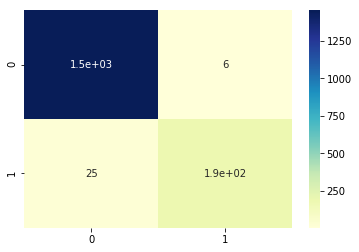

In [59]:
from sklearn.metrics import confusion_matrix

y_pred=ensemble.predict(X_test_vect)
CT_ensemble=confusion_matrix(y_test,y_pred)
sns.heatmap(CT_SVM,annot=True,cmap='YlGnBu')

In [60]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred,pos_label='spam')

0.9947089947089947

In [61]:
from sklearn.metrics import roc_curve, auc
#Get the probability for each point in the test set.
probs = ensemble.predict_proba(X_test_vect)
probs[0:6]


array([[2.66667048e-02, 9.73333295e-01],
       [4.24293934e-07, 9.99999576e-01],
       [9.99585772e-01, 4.14227898e-04],
       [9.99712292e-01, 2.87708239e-04],
       [9.99946988e-01, 5.30123039e-05],
       [3.89312281e-01, 6.10687719e-01]])

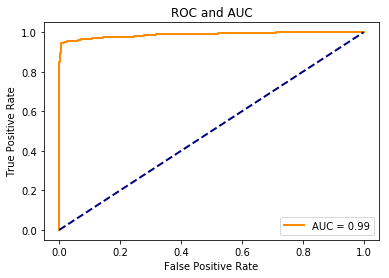

AUC score: 0.988


In [62]:
# Compute ROC curve and AUC for for the one class
fpr, tpr, _ = roc_curve(y_test, probs[:,1],pos_label='spam')
roc_auc = auc(fpr, tpr)
  
# Plot the ROC curve.
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.legend(loc="best")
plt.show()
print("AUC score: %3.3f" % roc_auc)

From the heatmap and ROC curve its pretty evident that the ensemble model gives high precision =99.5% with minimal tuning